In [66]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns


#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  


#import the necessary modelling algos.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score,classification_report
from sklearn.model_selection import GridSearchCV



#preprocess.
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder

In [2]:
!pip install imbalanced-learn==0.6.0
!pip install scikit-learn==0.22.1

In [3]:
from imblearn.over_sampling import SMOTE

In [8]:
!pip install plotly

In [4]:
df=pd.read_csv(r'C:\Users\GD077686\OneDrive - Cerner Corporation\Desktop\datatrained\New folder\WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


# Dataset Description                                                                                                     
- Age: Employee's age From 18 to 60 years old.
-  Attrition: Whether the employee left the company or not.
- BusinessTravel:How frequently the employee travels . (3 categories: Travel Rarely, Travel Frequently, Non-Travel )
- Daily Rate: The amount of money that employee receive per day.
-  Department: The department that an employee works for.(R&D, HR, Sales)
- DistanceFromHome: Distance in miles from company to employee's home.
- Education:Employee euducational level (5 categories:Below College,College,Bachelor,Master,Doctor)
- EmployeeCount: Number of Employee information included in a row. Doesn’t matter
-  EmployeeNumber: The ID number of the employee.
- EnvironmentSatisfaction:How satisfied the employee feels with the environment of the company. (5 categories: 1 'Low' 2    -'Medium' 3 'High' 4 'Very High')
- Gender: Male or Female.
- HourlyRate: The amount of money that employee receives per hour.
- JobInvolvement: The involvement level of an employee in the current job role. (4 categories:Low,Medium,High,Very High.)
- JobLevel:The level of the employee’s job position in the company (1 - Entry level, 5- Manager/Director position)
- JobRole:The job title/ designation of the employee ( Ex: sales executive, research director.
- JobSatisfaction: How satisfied an employee is with the nature of the work. (4 categories:Low,Medium,High,Very High? )
- MaritalStatus: :Single, Married or Divorced.
- MonthlyIncome: Amount employee gets paid per month.
- MonthlyRate:the amount of money that employee receives per month.
- NumCompaniesWorked:Number of companies an employee has worked for.
- Over18: Age of the employee is over 18 or not.
- OverTime: Employee works overtime or not.
- PercentSalaryHike: The % change in salary over previous year.
- PerformanceRating: Annual rating of an employee’s performance. (4 categories:Low,Good,Excellent,Outstanding.)
- RelationshipSatisfaction:How happy is an employee with her/his colleagues. (4 categories:Low,Medium,High,Very High.)
- StandardHours: Bi-monthly standard hours of an employee - 80 hrs.(8 hrs per day)
- StockOptionLevel: How much company stocks option employee own. (4 categories: 0- No stock options 3- High stock option value)
- TotalWorkingYears: Total number of years an employee has worked for.
- TrainingTimesLastYear: Total number of times an employee has taken training in last year. Here we are consider the training is  not mandatory because the range of data from 0 to 6.
- WorkLifeBalance: How an employee perceives the balance between work schedule and personal life.(4  categories:Bad,Good,Better,Best.)
- YearsAtCompany: Total number of years an employee worked at that company.
- YearsInCurrentRole: Total number of years an employee worked in the current role.
- YearsSinceLastPromotion: Total number of years since an employee had a promotion.
- YearsWithCurrManager: Total number of years an employee has worked for the same manager.

# Lets check for missing values
df.isnull().sum()

In [6]:
#Let check the no of  columns and rows in dataset with their dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [7]:
df.Over18.unique()

array(['Y'], dtype=object)

In [8]:
pd.set_option('max_row',None)
pd.set_option('max_columns',None)
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,Y,No,13,3,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,3,Female,81,4,1,Laboratory Technician,1,Married,2670,9964,4,Y,Yes,20,4,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,4,Male,67,3,1,Laboratory Technician,3,Divorced,2693,13335,1,Y,No,22,4,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,4,Male,44,2,3,Manufacturing Director,3,Single,9526,8787,0,Y,No,21,4,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,3,Male,94,3,2,Healthcare Representative,3,Married,5237,16577,6,Y,No,13,3,2,80,2,17,3,2,7,7,7,7


In [9]:
df.BusinessTravel.unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [10]:
df.EducationField.unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

# Preprocessing 

In [12]:
df.StandardHours.unique()

array([80], dtype=int64)

In [13]:
df.EmployeeCount.unique()

array([1], dtype=int64)

In [14]:
#dropping this columns with only one Unique values
df.drop(labels=['Over18','StandardHours','EmployeeCount'],inplace=True,axis=1)


In [15]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [16]:
df.shape[1]

32

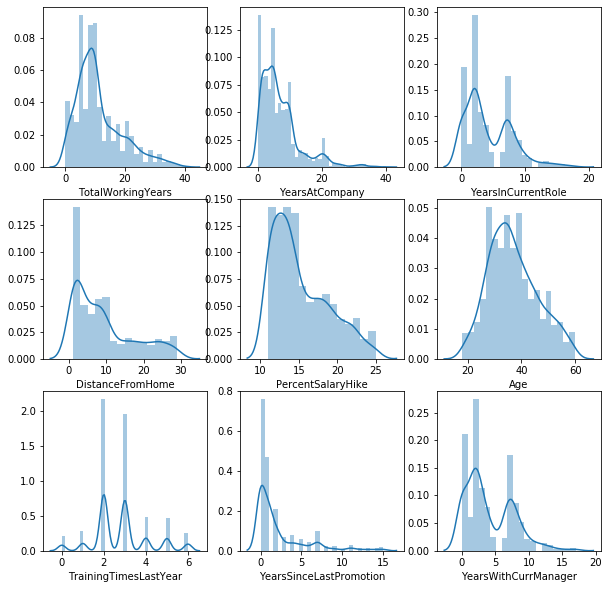

In [17]:
fig,ax=plt.subplots(3,3, figsize=(10,10))
sns.distplot(df['TotalWorkingYears'],ax=ax[0,0])
sns.distplot(df['YearsAtCompany'],ax=ax[0,1])
sns.distplot(df['YearsInCurrentRole'],ax=ax[0,2])
sns.distplot(df['DistanceFromHome'],ax=ax[1,0])
sns.distplot(df['PercentSalaryHike'],ax=ax[1,1])
sns.distplot(df['Age'],ax=ax[1,2])
sns.distplot(df['TrainingTimesLastYear'],ax=ax[2,0])
sns.distplot(df['YearsSinceLastPromotion'],ax=ax[2,1])
sns.distplot(df['YearsWithCurrManager'],ax=ax[2,2])
plt.show()

Let us now analyse the the various categorical features.

In [18]:
cat_df=df.select_dtypes(include='object')

In [19]:
cat_df.columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime'],
      dtype='object')

In [20]:
def plot_cat(attr,labels=None):
    if(attr=='JobRole'):
        sns.factorplot(data=df,kind='count',size=5,aspect=3,x=attr)
        return
    sns.factorplot(data=df,kind='count',size=5,aspect=1.5,x=attr)

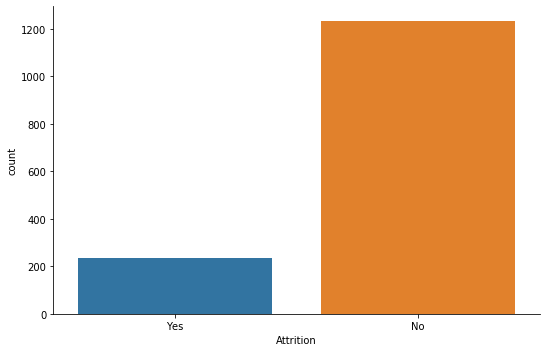

In [21]:
plot_cat('Attrition')

From the above observations  data look imblance classification problem,Which we will deal later.

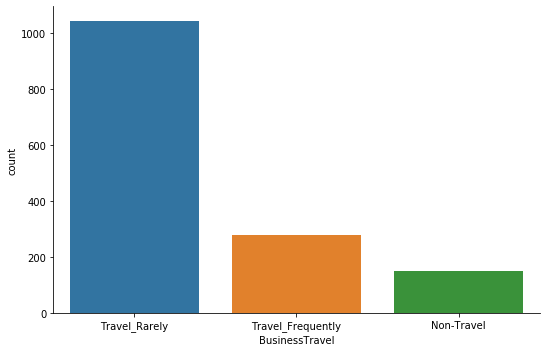

In [22]:
plot_cat('BusinessTravel')

The above plot clearly show that most people belong to travel rarely class.this indicate that most of the people did not ahev job which asked them for frequently travelling.

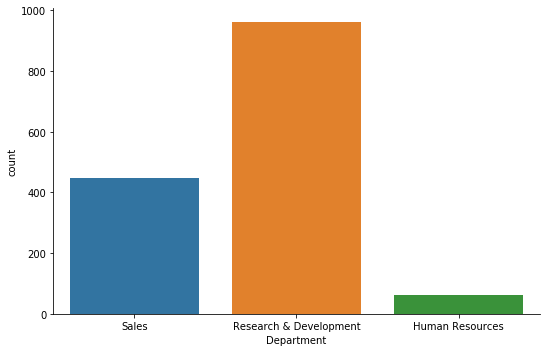

In [23]:
plot_cat('Department')

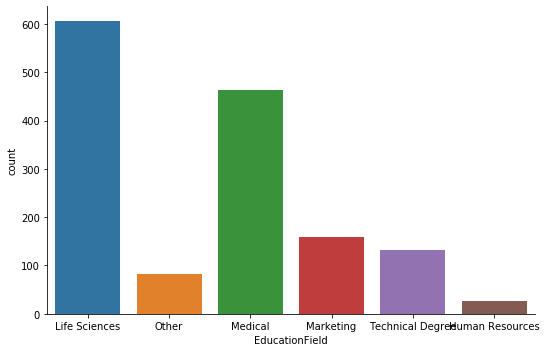

In [24]:
plot_cat('EducationField')

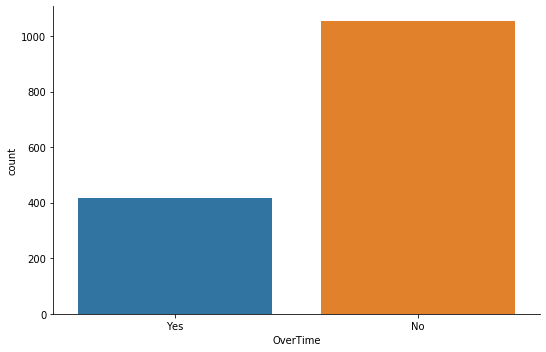

In [25]:
plot_cat('OverTime')

Most of the people dont prefer working overtime 

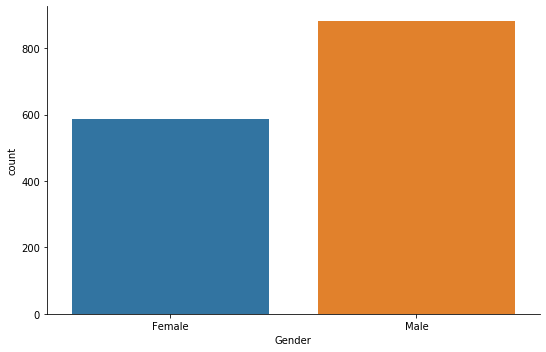

In [26]:
plot_cat('Gender')

In [29]:
df['Gender'].value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

There is not much differnce between male and female population

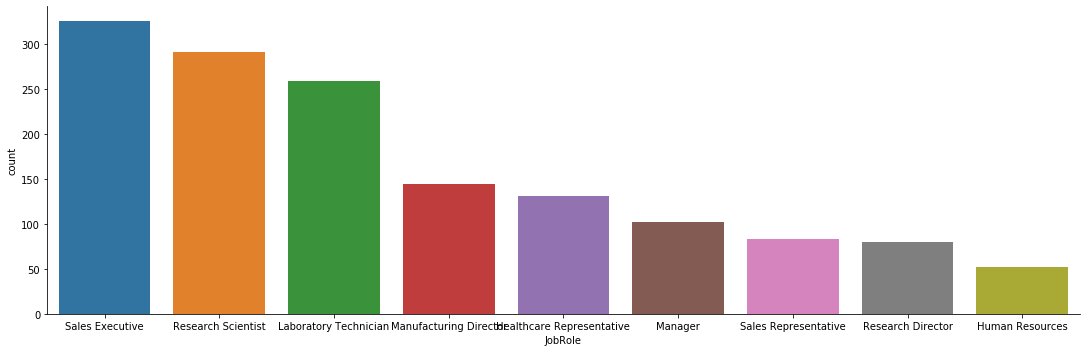

In [30]:
plot_cat('JobRole')

Most of the people are in the lower level job , whichis obvious 

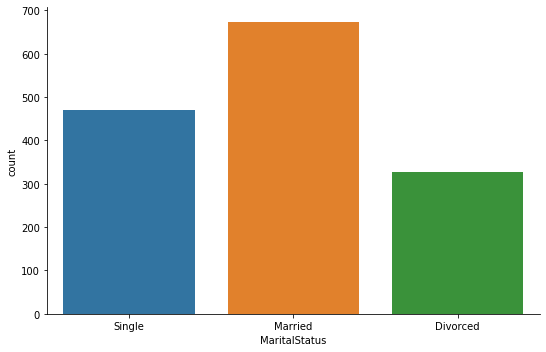

In [31]:
plot_cat('MaritalStatus')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome               1470 non-null int64
MonthlyRate           

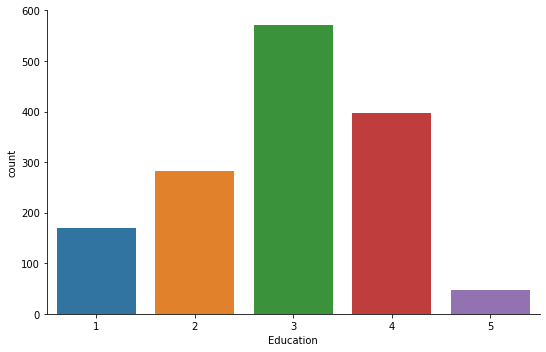

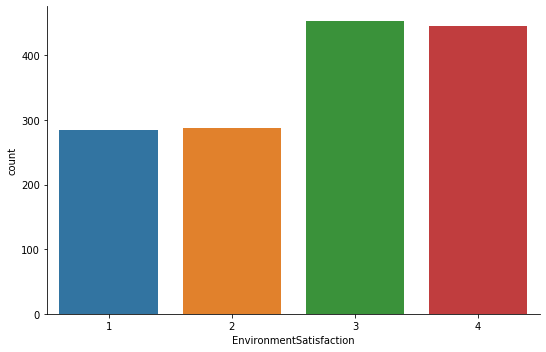

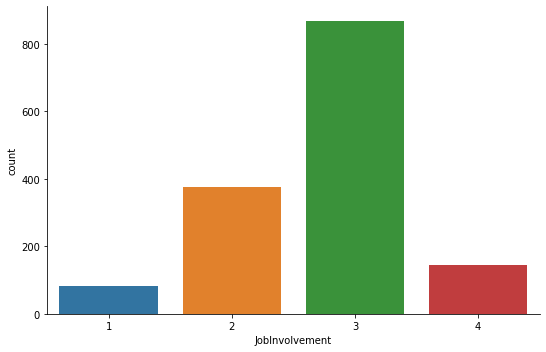

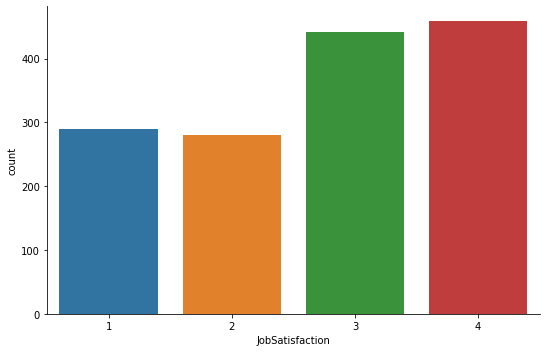

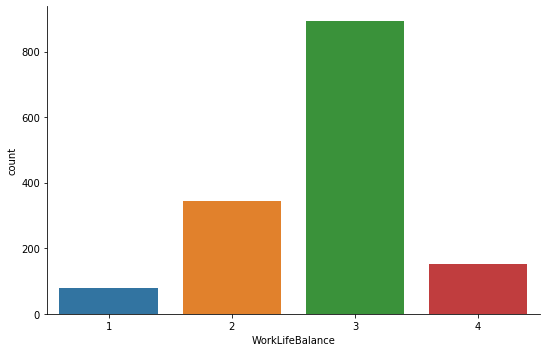

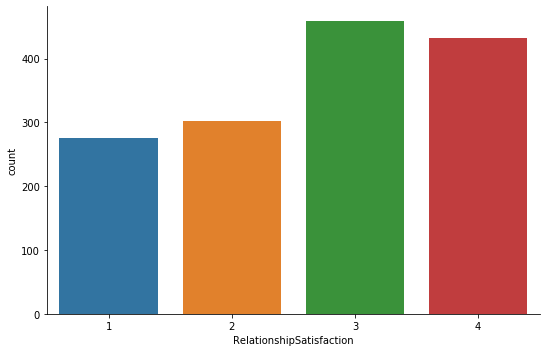

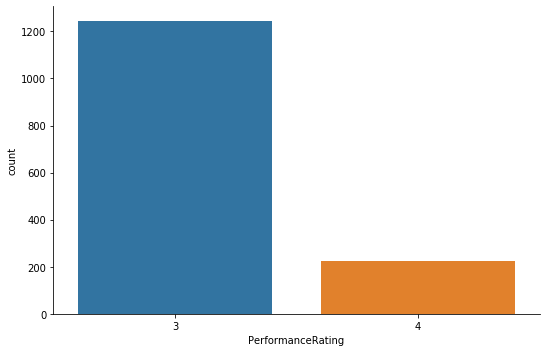

In [33]:
num_disc= ['Education','EnvironmentSatisfaction','JobInvolvement','JobSatisfaction','WorkLifeBalance'
           ,'RelationshipSatisfaction','PerformanceRating']
for i in num_disc:
    plot_cat(i)
    

- most of the PerformanceRating are in the category 3->1200 + ,4 -->210
- Most of the people have good WorkLifeBalance
- Most of the people's education level is Bachelor,Master,Doctor)

# 2) Correlation b/w features using corr


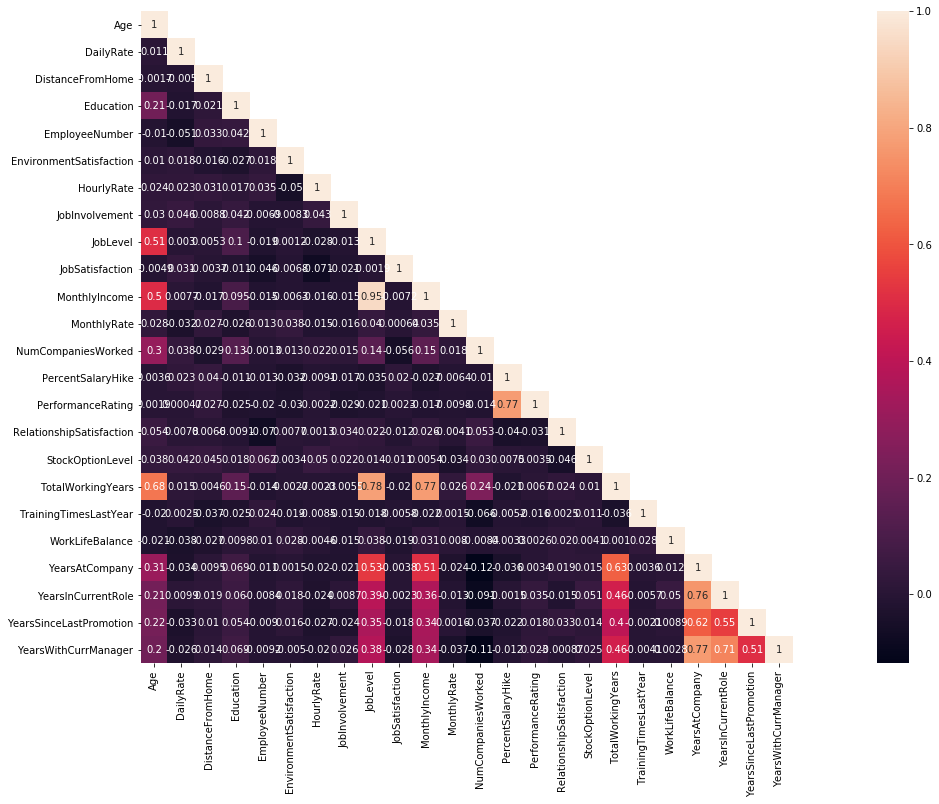

In [34]:
cor_mat= df.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
ax=sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)
bottom, top =ax.get_ylim()
ax.set_ylim(bottom + 0.5 ,top - 0.5)
plt.show()

#Some Inference from above Heat map
- 1) Monthly income is strongly related to joblevel as expected as senior employees will definately earn more.
- 2) Totalworkingyear is related to age as ages increases ,experience also increases.
- 3) Totalworkingyear is highly related to job Level and Montly income.
- 4) YearsInCurrentRole is related to YearsAtCompany
- 5) YearsWithCurrManager is related to YearsAtCompany
- 6) PercentSalaryHike is related to performance rating

# 3) Feature Selection

# 3.1 ) Plotting the Features against the 'Target' variable

In [35]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

Note that Age is a continuous quantity and therefore we can plot it against the Attrition using a boxplot.

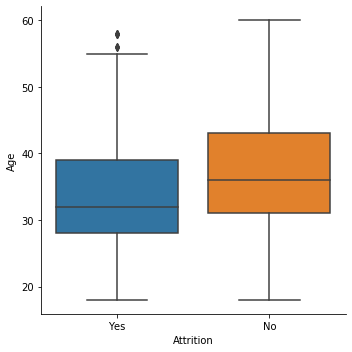

In [36]:
sns.factorplot(data=df,y='Age',x='Attrition',kind='box',size=5,aspect=1)

- People with higher age have less tendency to leave the job


3.1.2 ) Department 

In [37]:
df['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

- Most of the people are in sales and Research & Development so attrition rate will be high in these two department 

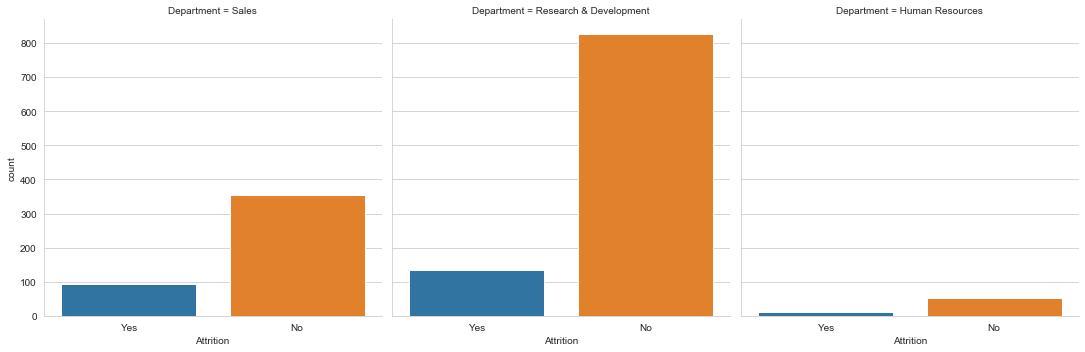

In [38]:
sns.set_style("whitegrid")
sns.factorplot(data=df,x='Attrition',col='Department',kind='count')

In [39]:
pd.crosstab(columns=[df.Attrition],index=[df.Department],margins=True,normalize='index')

Attrition,No,Yes
Department,,
Human Resources,0.809524,0.190476
Research & Development,0.861602,0.138398
Sales,0.793722,0.206278
All,0.838776,0.161224


- 81% people in Hr dont want to leave 
- 86 % people in Research & Development dont want to leave
- 79 % people in sales dont want to leave 

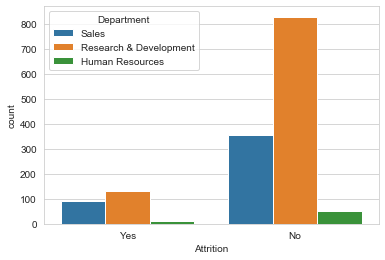

In [40]:
sns.countplot(x='Attrition',data=df,hue='Department')

# 3.1.3 ) Gender

In [41]:
pd.crosstab(columns=[df.Attrition],index=[df.Gender],margins=True,normalize='index')# set normalize=index to view rowwise %.

Attrition,No,Yes
Gender,,
Female,0.852041,0.147959
Male,0.829932,0.170068
All,0.838776,0.161224


- 85% of Women wanna stay in company while only 14 % want to leave.
- 82% of Men  wanna stay in company while only 17 % want to leave

# 3.1.4 ) Job Level

In [42]:
pd.crosstab(columns=[df.Attrition],index=[df.JobLevel],margins=True,normalize='index')

Attrition,No,Yes
JobLevel,,
1,0.736648,0.263352
2,0.902622,0.097378
3,0.853211,0.146789
4,0.952830,0.047170
5,0.927536,0.072464
All,0.838776,0.161224


- As the job level increases people have less tendency to leave
- only 7% want to leave the company at job level 5 
- junior level people have tendency to leave the company 26 %

# 3.1.5 ) Monthly income

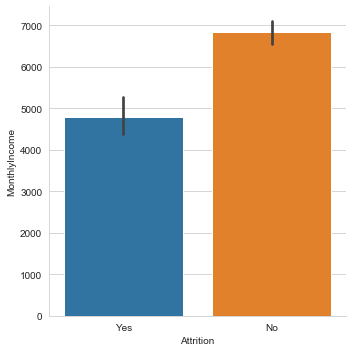

In [43]:
sns.factorplot(x='Attrition',y='MonthlyIncome',data=df,kind='bar')

- Employee with salary above 6500 tend to stay in company

- Similarly those employees who are probably not earning well will certainly want to change the company.

# 3.1.6 ) Job Satisfaction

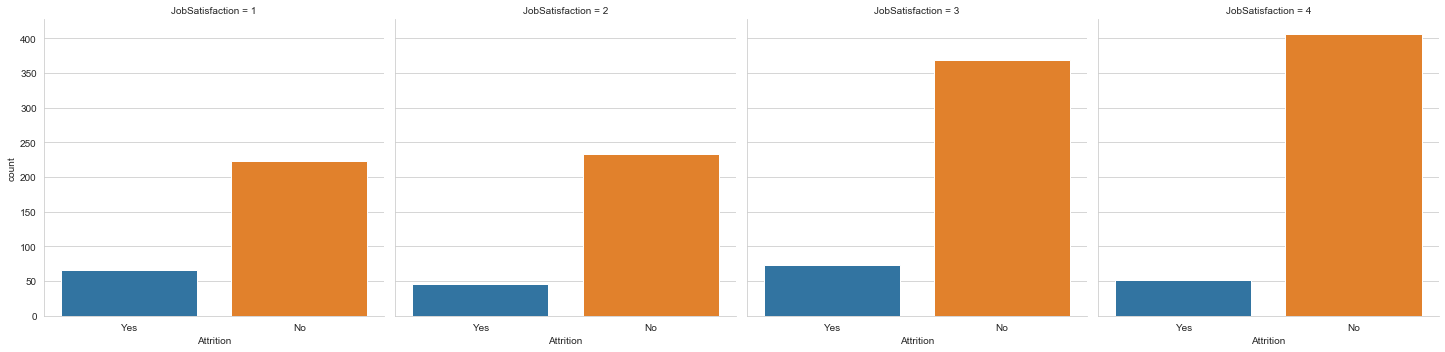

In [44]:
sns.factorplot(data=df,kind='count',x='Attrition',col='JobSatisfaction')



In [45]:
pd.crosstab(columns=df.Attrition,index=df.JobSatisfaction,normalize='index')

Attrition,No,Yes
JobSatisfaction,,
1,0.771626,0.228374
2,0.835714,0.164286
3,0.834842,0.165158
4,0.886710,0.113290


- Note this shows an interesting trend. Note that for higher values of job satisfaction( ie more a person is satisfied with his job) lesser percent of them say a 'Yes' which is quite obvious as highly contented workers will obvioulsy not like to leave the organisation.

# 3.1.7 ) Environment Satisfaction

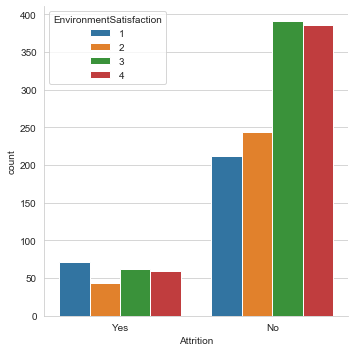

In [46]:
sns.factorplot(data=df,kind='bar',x='Attrition',y='EnvironmentSatisfaction')
sns.countplot(data=df,x='Attrition',hue='EnvironmentSatisfaction')

In [47]:
df.EnvironmentSatisfaction.unique()

array([2, 3, 4, 1], dtype=int64)

In [48]:
pd.crosstab(columns=df.Attrition,index=df.EnvironmentSatisfaction,normalize='index')

Attrition,No,Yes
EnvironmentSatisfaction,,
1,0.746479,0.253521
2,0.850174,0.149826
3,0.863135,0.136865
4,0.865471,0.134529


- Again we can see that percent is high  with good EnvironmentSatisfaction .

# 3.1.9 ) Work Life Balance

In [49]:

pd.crosstab(columns=[df.Attrition],index=[df.WorkLifeBalance],margins=True,normalize='index') # set normalize=index to view rowwise %.

Attrition,No,Yes
WorkLifeBalance,,
1,0.687500,0.312500
2,0.831395,0.168605
3,0.857783,0.142217
4,0.823529,0.176471
All,0.838776,0.161224


Again we notice a similar trend as people with better work life balance dont want to leave the organisation.

# 3.1.10 ) RelationshipSatisfaction

In [50]:
pd.crosstab(columns=[df.Attrition],index=[df.RelationshipSatisfaction],margins=True,normalize='index') # set normalize=index to view rowwise %.

Attrition,No,Yes
RelationshipSatisfaction,,
1,0.793478,0.206522
2,0.851485,0.148515
3,0.845316,0.154684
4,0.851852,0.148148
All,0.838776,0.161224


# 3.2 ) Feature Selection

In [51]:

df.drop(['BusinessTravel','DailyRate','EmployeeNumber','HourlyRate','MonthlyRate'
          ,'NumCompaniesWorked', 'StockOptionLevel','TrainingTimesLastYear'],axis=1,inplace=True)

# 4 ) Preparing Dataset¶


- Before feeding our data into a ML model we first need to prepare the data. This includes encoding all the categorical features (either LabelEncoding or the OneHotEncoding) as the model expects the features to be in numerical form. Also for better performance we will do the feature scaling ie bringing all the features onto the same scale by using the StandardScaler provided in the scikit library.

# 4.1 ) Feature Encoding

In [52]:
def transform(feature):
    le=LabelEncoder()
    df[feature]=le.fit_transform(df[feature])
    print(le.classes_)

In [53]:
cat_df=df.select_dtypes(include='object')
cat_df.columns

Index(['Attrition', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime'],
      dtype='object')

In [54]:
for col in cat_df.columns:
    transform(col)

['No' 'Yes']
['Human Resources' 'Research & Development' 'Sales']
['Human Resources' 'Life Sciences' 'Marketing' 'Medical' 'Other'
 'Technical Degree']
['Female' 'Male']
['Healthcare Representative' 'Human Resources' 'Laboratory Technician'
 'Manager' 'Manufacturing Director' 'Research Director'
 'Research Scientist' 'Sales Executive' 'Sales Representative']
['Divorced' 'Married' 'Single']
['No' 'Yes']


In [55]:
df.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1,2,1,2,0,3,2,7,4,2,5993,1,11,3,1,8,1,6,4,0,5
1,49,0,1,8,1,1,3,1,2,2,6,2,1,5130,0,23,4,4,10,3,10,7,1,7
2,37,1,1,2,2,4,4,1,2,1,2,3,2,2090,1,15,3,2,7,3,0,0,0,0
3,33,0,1,3,4,1,4,0,3,1,6,3,1,2909,1,11,3,3,8,3,8,7,3,0
4,27,0,1,2,1,3,1,1,3,1,2,2,1,3468,0,12,3,4,6,3,2,2,2,2


# 4.2 ) Feature Scaling

- The scikit library provides various types of scalers including MinMax Scaler and the StandardScaler. Below I have used the StandardScaler to scale the data

In [56]:
scaler=StandardScaler()
scaled_df= scaler.fit_transform(df.drop(['Attrition'],axis=1))
X=scaled_df
y=df['Attrition'].as_matrix()

# 4.3 ) Splitting the data into training and validation sets¶

In [57]:
x_train,x_test,y_train,y_test= train_test_split(X,y,test_size=0.25,random_state=42)

# 5 ) Modelling

# 5.1 ) Handling the Imbalanced dataset


- Note that we have a imbalanced dataset with majority of observations being of one type ('NO') in our case. In this dataset for example we have about 84 % of observations having 'No' and only 16 % of 'Yes' and hence this is an imbalanced dataset.

- To deal with such a imbalanced dataset we have to take certain measures, otherwise the performance of our model can be significantly affected. 

In [58]:
oversampler=SMOTE(random_state=42)
x_train_smote, y_train_smote =oversampler.fit_sample(x_train,y_train)

# 5.2 ) Building A Model & Making Predictions

In [59]:
def compare(model):
    clf=model
    clf.fit(x_train_smote,y_train_smote)
    pred=clf.predict(x_test)
    
  #calculating the metrics
    acc.append(accuracy_score(pred,y_test))
    prec.append(precision_score(pred,y_test))
    rec.append(recall_score(pred,y_test))
    auroc.append(roc_auc_score(pred,y_test))
    

In [60]:
acc=[]
prec=[]
rec=[]
auroc=[]
models=[SVC(kernel='rbf'),RandomForestClassifier(),GradientBoostingClassifier()]
model_names=['rbfSVM','RandomForestClassifier','GradientBoostingClassifier']

for model in range(len(models)):
    compare(models[model])
    
d={'Modelling Algo':model_names,'Accuracy':acc,'Precision':prec,'Recall':rec,'Area Under ROC Curve':auroc}
met_df=pd.DataFrame(d)
met_df

,Modelling Algo,Accuracy,Precision,Recall,Area Under ROC Curve
0,rbfSVM,0.828804,0.458333,0.372881,0.644369
1,RandomForestClassifier,0.861413,0.187500,0.428571,0.658090
2,GradientBoostingClassifier,0.847826,0.291667,0.388889,0.643240


- Random forest is best model for prediction as it has accuracu of 86 % and even the roc_auc score is high.

In [62]:
def comp_models(met_df,metric):
    sns.factorplot(data=met_df,x=metric,y='Modelling Algo',size=5,aspect=1.5,kind='bar')
    sns.factorplot(data=met_df,y=metric,x='Modelling Algo',size=7,aspect=2,kind='point')

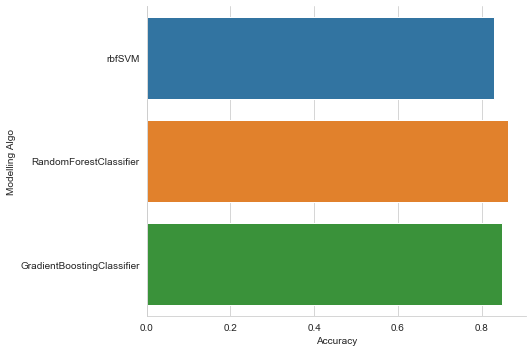

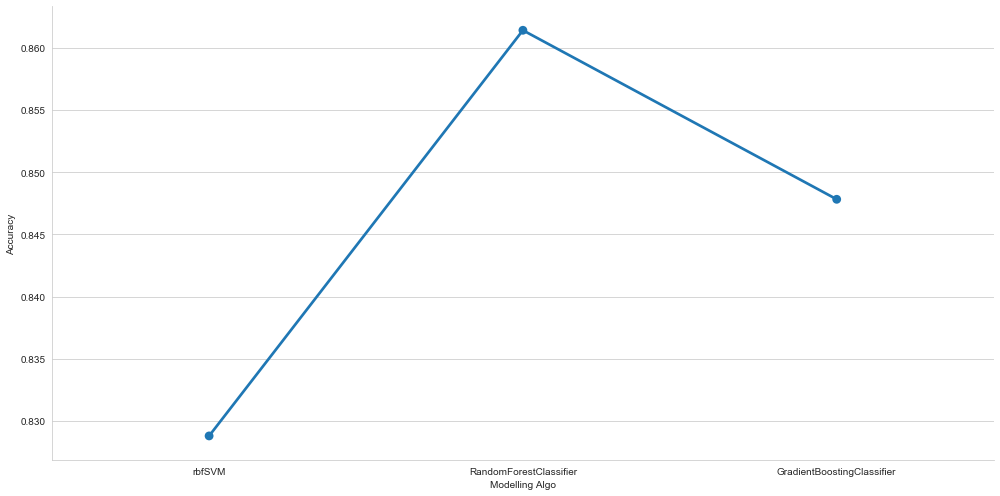

In [63]:
comp_models(met_df,'Accuracy')

# Hyperparamter tunning using Random Forest

In [69]:
clf=RandomForestClassifier()
params={
    'n_estimators' : [13,15,16],
    'criterion' : ['gini','Entropy'],
    'max_depth' : [6,7,8,9,10],
    'min_samples_split' :[10,11,12,13],
    'min_samples_leaf' : [3,4,5,6]
   }
grid=GridSearchCV(clf,param_grid=params,n_jobs=-1)
grid.fit(x_train_smote,y_train_smote)
print("best params :",grid.best_params_)
#instantating with best params
clf=grid.best_estimator_
clf.fit(x_train_smote,y_train_smote)
y_pred=clf.predict(x_test)

conf_mat= confusion_matrix(y_test,y_pred)

print("confusion matrix ",'/n',conf_mat)
print(" accuracy matrix :", accuracy_score(y_test,y_pred))

best params : {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 15}
confusion matrix  /n [[296  24]
 [ 33  15]]
 accuracy matrix : 0.845108695652174


- even after doing the Hyperparamter tunning model performance did not improve 

In [67]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       320
           1       0.39      0.23      0.29        48

    accuracy                           0.85       368
   macro avg       0.64      0.59      0.60       368
weighted avg       0.83      0.85      0.84       368



In [71]:
#saving the final model
import pickle
with open( "modelfor prediction.sav",'wb') as f:
    pickle.dump(clf,f)

- Hence we have completed the analysis of the data and also made predictions using the various ML models